#### INRODUCTION: This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage. The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1]:
    names = ['No_of_times_pregnant',
     'Plasma_glucose_conc',
    'Diastolic_blood_pressure',
    'Triceps_skin_fold_thickness',
    'insulin_level',
    'BMI',
    'Diabetes_pedigree_function',
    'Age', 
    'Outcome']

In [3]:
data = pd.read_csv('pima-indians-diabetesdata.csv',names=names)

FileNotFoundError: [Errno 2] No such file or directory: 'pima-indians-diabetesdata.csv'

In [ ]:
data

### Splitting the data before performing any feature engineering to avoid data leakage from test to train

In [266]:
from sklearn.model_selection import train_test_split

In [434]:
train,test = train_test_split(data,test_size=0.2,random_state=0)

In [435]:
train.describe()

,No_of_times_pregnant,Plasma_glucose_conc,Diastolic_blood_pressure,Triceps_skin_fold_thickness,insulin_level,BMI,Diabetes_pedigree_function,Age,Outcome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.874593,120.895765,69.226384,20.623779,82.136808,32.206678,0.466471,33.594463,0.359935
std,3.443637,31.809725,19.550893,16.052529,117.491581,7.914276,0.333203,12.016168,0.480372
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.500000,0.238000,24.000000,0.000000
50%,3.000000,117.500000,72.000000,23.000000,37.000000,32.400000,0.369000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.750000,130.000000,36.775000,0.606500,41.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [436]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 603 to 684
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   No_of_times_pregnant         614 non-null    int64  
 1   Plasma_glucose_conc          614 non-null    int64  
 2   Diastolic_blood_pressure     614 non-null    int64  
 3   Triceps_skin_fold_thickness  614 non-null    int64  
 4   insulin_level                614 non-null    int64  
 5   BMI                          614 non-null    float64
 6   Diabetes_pedigree_function   614 non-null    float64
 7   Age                          614 non-null    int64  
 8   Outcome                      614 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 48.0 KB


In [270]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 661 to 380
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   No_of_times_pregnant         154 non-null    int64  
 1   Plasma_glucose_conc          154 non-null    int64  
 2   Diastolic_blood_pressure     154 non-null    int64  
 3   Triceps_skin_fold_thickness  154 non-null    int64  
 4   insulin_level                154 non-null    int64  
 5   BMI                          154 non-null    float64
 6   Diabetes_pedigree_function   154 non-null    float64
 7   Age                          154 non-null    int64  
 8   Outcome                      154 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 12.0 KB


In [271]:
test.describe()

,No_of_times_pregnant,Plasma_glucose_conc,Diastolic_blood_pressure,Triceps_skin_fold_thickness,insulin_level,BMI,Diabetes_pedigree_function,Age,Outcome
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,3.727273,120.889610,68.623377,20.188312,70.480519,31.138961,0.493429,31.831169,0.305195
std,3.064178,32.719358,18.611641,15.592343,105.654463,7.729337,0.323914,10.598314,0.461992
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,21.000000,0.000000
25%,1.000000,100.500000,64.000000,0.000000,0.000000,26.525000,0.258250,24.000000,0.000000
50%,3.000000,114.500000,71.000000,22.000000,0.000000,31.200000,0.383000,28.000000,0.000000
75%,5.000000,137.750000,79.500000,32.000000,115.000000,35.650000,0.670250,38.000000,1.000000
max,13.000000,199.000000,108.000000,50.000000,579.000000,52.900000,1.699000,65.000000,1.000000


## Handling missing data

### Values of glucose_conc, blood pressure, insulin level, BMI, skin_fold_thickness cannot be zero. Hence, they are actually missing values substituted with 0. Replace them with NaN

In [437]:
zero_columns = ['Plasma_glucose_conc','Diastolic_blood_pressure','Triceps_skin_fold_thickness','insulin_level','BMI']
for c in zero_columns:
    train[c] = train[c].replace(0,np.NaN)
    test[c] = test[c].replace(0,np.NaN)

In [438]:
#imputing missig values with median acc to outcome
def impute(data,c):
    df = data[data[c].notnull()]
    df = df[[c,'Outcome']]
    gr = df.groupby('Outcome')
    med = gr.median().T
    return med

In [439]:
for c in zero_columns:
    train[c].loc[(train[c].isnull()) & (train['Outcome'] == 0)] = impute(train,c)[0][0]
    train[c].loc[(train[c].isnull()) & (train['Outcome'] == 1)] = impute(train,c)[1][0]
    test[c].loc[(test[c].isnull()) & (test['Outcome'] == 0)] = impute(test,c)[0][0]
    test[c].loc[(test[c].isnull()) & (test['Outcome'] == 1)] = impute(test,c)[1][0]

In [275]:
test.describe()

,No_of_times_pregnant,Plasma_glucose_conc,Diastolic_blood_pressure,Triceps_skin_fold_thickness,insulin_level,BMI,Diabetes_pedigree_function,Age,Outcome
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,3.727273,121.590909,71.409091,28.792208,132.285714,31.737013,0.493429,31.831169,0.305195
std,3.064178,31.235059,12.438404,9.011014,82.100505,6.360098,0.323914,10.598314,0.461992
min,0.000000,61.000000,30.000000,10.000000,16.000000,18.200000,0.100000,21.000000,0.000000
25%,1.000000,102.000000,64.000000,23.250000,92.000000,26.725000,0.258250,24.000000,0.000000
50%,3.000000,114.500000,72.000000,28.000000,92.000000,31.250000,0.383000,28.000000,0.000000
75%,5.000000,137.750000,79.500000,35.000000,175.000000,35.650000,0.670250,38.000000,1.000000
max,13.000000,199.000000,108.000000,50.000000,579.000000,52.900000,1.699000,65.000000,1.000000


In [276]:
train.describe()

,No_of_times_pregnant,Plasma_glucose_conc,Diastolic_blood_pressure,Triceps_skin_fold_thickness,insulin_level,BMI,Diabetes_pedigree_function,Age,Outcome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.874593,121.700326,72.627850,29.180782,143.723127,32.609202,0.466471,33.594463,0.359935
std,3.443637,30.292884,12.022424,8.942898,90.777581,6.998662,0.333203,12.016168,0.480372
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,25.000000,105.000000,27.600000,0.238000,24.000000,0.000000
50%,3.000000,118.000000,72.000000,28.000000,105.000000,32.400000,0.369000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.750000,167.000000,36.775000,0.606500,41.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Univariate feature analysis

<AxesSubplot:xlabel='Age'>

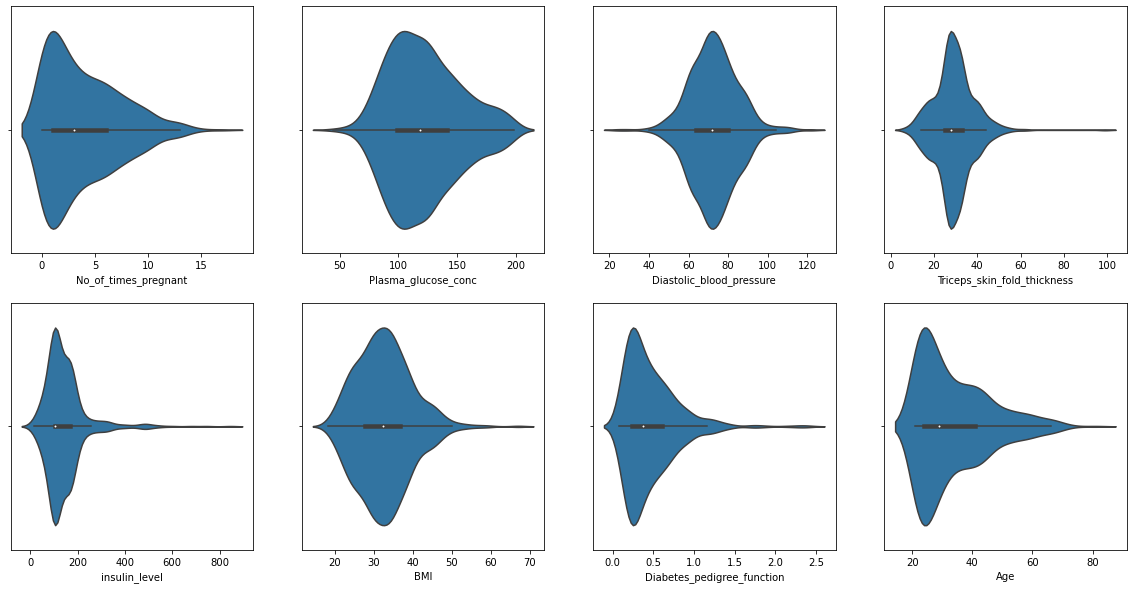

In [15]:
fig,ax = plt.subplots(2,4,figsize=(20,10))
sns.violinplot(ax=ax[0,0],x=train.No_of_times_pregnant)
sns.violinplot(ax=ax[0,1],x=train.Plasma_glucose_conc)
sns.violinplot(ax=ax[0,2],x=train.Diastolic_blood_pressure)
sns.violinplot(ax=ax[0,3],x=train.Triceps_skin_fold_thickness)
sns.violinplot(ax=ax[1,0],x=train.insulin_level)
sns.violinplot(ax=ax[1,1],x=train.BMI)
sns.violinplot(ax=ax[1,2],x=train.Diabetes_pedigree_function)
sns.violinplot(ax=ax[1,3],x=train.Age)

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

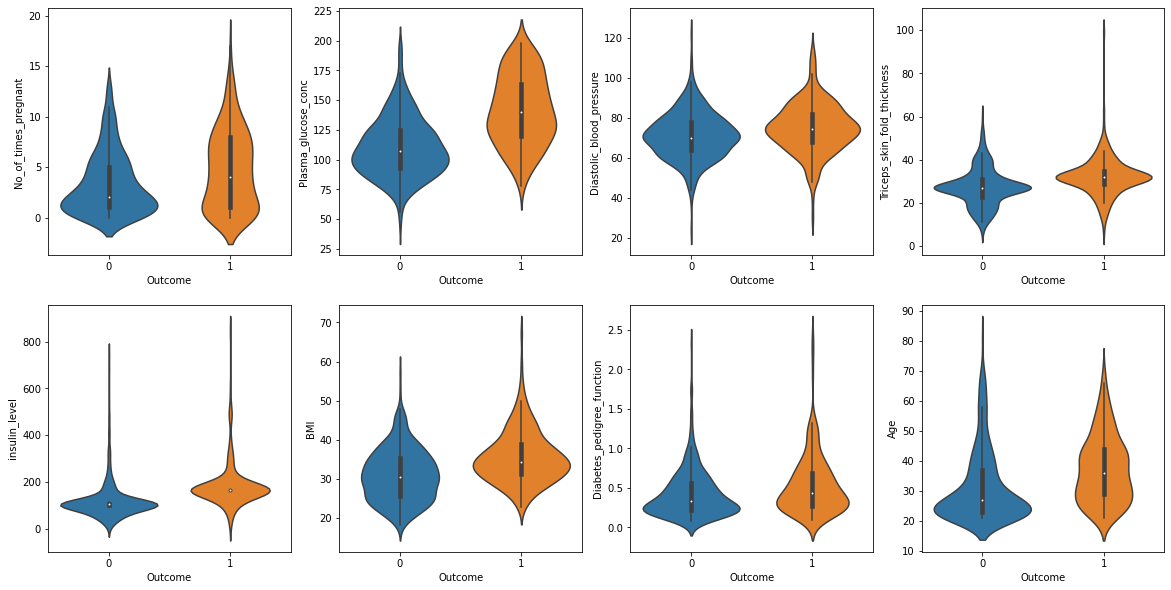

In [16]:
fig,ax = plt.subplots(2,4,figsize=(20,10))
sns.violinplot(ax=ax[0,0],y=train.No_of_times_pregnant,x=train.Outcome)
sns.violinplot(ax=ax[0,1],y=train.Plasma_glucose_conc,x=train.Outcome)
sns.violinplot(ax=ax[0,2],y=train.Diastolic_blood_pressure,x=train.Outcome)
sns.violinplot(ax=ax[0,3],y=train.Triceps_skin_fold_thickness,x=train.Outcome)
sns.violinplot(ax=ax[1,0],y=train.insulin_level,x=train.Outcome)
sns.violinplot(ax=ax[1,1],y=train.BMI,x=train.Outcome)
sns.violinplot(ax=ax[1,2],y=train.Diabetes_pedigree_function,x=train.Outcome)
sns.violinplot(ax=ax[1,3],y=train.Age,x=train.Outcome)

## Bivariate analysis

<AxesSubplot:>

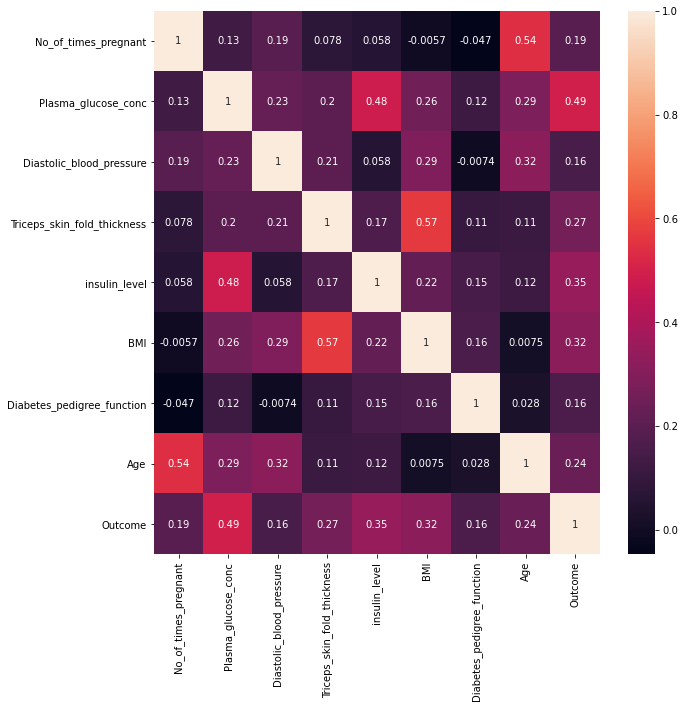

In [17]:
plt.figure(figsize=(10,10))
corr = train.corr()
sns.heatmap(corr,annot=True)

In [277]:
from sklearn.decomposition import PCA

In [631]:
X = train.iloc[:,:-1].values
y = train.iloc[:,-1].values
test_X = test.iloc[:,:-1].values
test_y = test.iloc[:,-1].values

In [632]:
pca = PCA(n_components=6)
pc = pca.fit(X)
X = pca.transform(X)
test_X = pca.transform(test_X)

In [633]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [634]:
from sklearn.metrics import precision_score,recall_score,classification_report
from sklearn.model_selection import RepeatedStratifiedKFold,cross_validate,cross_val_score

In [635]:
rskf = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)

In [636]:
import xgboost as xgb

In [637]:
datadmatrix = xgb.DMatrix(data=X,label=y)

In [638]:
import optuna

In [639]:
def objective(trial):
    params = {
        'objective':'reg:logistic',
        'eval_metric':'error',
        'seed':0,
        'max_depth':trial.suggest_int('max_depth',3,15),
        'eta':trial.suggest_uniform('eta',0.05,0.3),
        'min_child_weight':trial.suggest_int('min_child_weight',1,7),
        'gamma':trial.suggest_uniform('gamma',0,0.4),
        'colsample_bytree':trial.suggest_categorical('colsample_bytree',[0.5,0.6,0.7,0.8,0.9,1]),
        # 'subsample':trial.suggest_categorical('subsample',[0.5,0.6,0.7,0.8,0.9,1]),
        # 'scale_pos_weight':trial.suggest_int('scale_pos_weight',3,75),
        'lambda':trial.suggest_uniform('lambda',0.0001,10)
    }
    cv_results = xgb.cv(dtrain=datadmatrix,params=params,num_boost_round=200,early_stopping_rounds=10,nfold=100,stratified=True,as_pandas=True,seed=0)
    trial.set_user_attr('n_estimators',len(cv_results))
    return cv_results.loc[cv_results.shape[0]-1,'test-error-mean']

In [640]:
study = optuna.create_study(direction='minimize')

[I 2021-03-12 19:36:50,738] A new study created in memory with name: no-name-b429d516-30ca-424b-893c-81f36f308d85


In [641]:
study.optimize(objective,n_trials=25)

[I 2021-03-12 19:36:53,530] Trial 0 finished with value: 0.1376191 and parameters: {'max_depth': 15, 'eta': 0.2728877609378365, 'min_child_weight': 4, 'gamma': 0.027792041612552068, 'colsample_bytree': 0.8, 'lambda': 4.521150200628583}. Best is trial 0 with value: 0.1376191.
[I 2021-03-12 19:36:55,737] Trial 1 finished with value: 0.13119056 and parameters: {'max_depth': 11, 'eta': 0.22016641360176242, 'min_child_weight': 1, 'gamma': 0.21925593890105932, 'colsample_bytree': 0.5, 'lambda': 9.951643828008349}. Best is trial 1 with value: 0.13119056.
[I 2021-03-12 19:36:58,051] Trial 2 finished with value: 0.13809525999999997 and parameters: {'max_depth': 6, 'eta': 0.24932669645260747, 'min_child_weight': 3, 'gamma': 0.16324933335465516, 'colsample_bytree': 0.8, 'lambda': 8.660072616489236}. Best is trial 1 with value: 0.13119056.
[I 2021-03-12 19:37:00,049] Trial 3 finished with value: 0.13452385 and parameters: {'max_depth': 8, 'eta': 0.2039647295835546, 'min_child_weight': 6, 'gamma': 

In [642]:
study.best_value

0.13023816

In [643]:
study.trials_dataframe().loc[11]

number                                             11
value                                        0.130238
datetime_start             2021-03-12 19:37:14.623723
datetime_complete          2021-03-12 19:37:18.796243
duration                       0 days 00:00:04.172520
params_colsample_bytree                           0.5
params_eta                                   0.299584
params_gamma                                 0.225413
params_lambda                                 9.62135
params_max_depth                                   13
params_min_child_weight                             1
user_attrs_n_estimators                            32
state                                        COMPLETE
Name: 11, dtype: object

In [644]:
study.best_params

{'max_depth': 13,
 'eta': 0.2995843583129791,
 'min_child_weight': 1,
 'gamma': 0.22541251513122265,
 'colsample_bytree': 0.5,
 'lambda': 9.62135089187537}

In [646]:
params = {'max_depth': 13,
 'eta': 0.2995843583129791,
 'min_child_weight':1,
 'gamma': 0.22541251513122265,
 'colsample_bytree': 0.5,
#  'scale_pos_weight': 5,
 'n_estimators':32,
 'seed':0,
 'eval_metric':'error',
 'lambda':9.62135089187537
#  'objective':'reg:logistic'
}
# res = xgb.cv(dtrain=datadmatrix,num_boost_round=7,params=params,seed=1,as_pandas=True,nfold=10,stratified=True)
# print(1-res['test-error-mean'].loc[res.shape[0]-1])

### Hyperparameter tuning for knn to improve recall since the probability of getting detected if a person has diabetes should be more. Improving recall also helped improve the accuracy as seen by trial and error.

In [647]:
def objective1(trial):
    params = {
        'n_neighbours':trial.suggest_int('n_neighbours',1,27),
        'metric':trial.suggest_categorical('metric',['euclidean','minkowski','manhattan']),
        'weights':trial.suggest_categorical('weights',['uniform','distance'])
    }
    scores = cross_val_score(KNeighborsClassifier(),X=X,y=y,scoring='accuracy',cv=rskf,n_jobs=-1)
    return scores.mean()

In [648]:
study = optuna.create_study(direction='maximize')

[I 2021-03-12 19:39:31,211] A new study created in memory with name: no-name-00370462-2257-4cc3-b857-a25ad9f6f1f6


In [649]:
study.optimize(objective1,n_trials=50)

[I 2021-03-12 19:39:31,879] Trial 0 finished with value: 0.8366296492155827 and parameters: {'n_neighbours': 19, 'metric': 'manhattan', 'weights': 'uniform'}. Best is trial 0 with value: 0.8366296492155827.
[I 2021-03-12 19:39:32,019] Trial 1 finished with value: 0.8366296492155827 and parameters: {'n_neighbours': 10, 'metric': 'minkowski', 'weights': 'uniform'}. Best is trial 0 with value: 0.8366296492155827.
[I 2021-03-12 19:39:32,155] Trial 2 finished with value: 0.8366296492155827 and parameters: {'n_neighbours': 27, 'metric': 'manhattan', 'weights': 'distance'}. Best is trial 0 with value: 0.8366296492155827.
[I 2021-03-12 19:39:32,295] Trial 3 finished with value: 0.8366296492155827 and parameters: {'n_neighbours': 18, 'metric': 'manhattan', 'weights': 'uniform'}. Best is trial 0 with value: 0.8366296492155827.
[I 2021-03-12 19:39:32,466] Trial 4 finished with value: 0.8366296492155827 and parameters: {'n_neighbours': 26, 'metric': 'euclidean', 'weights': 'uniform'}. Best is tria

In [650]:
study.best_params

{'n_neighbours': 19, 'metric': 'manhattan', 'weights': 'uniform'}

In [673]:
m1 = LogisticRegression()
m2 = SVC(C=100,gamma=0.1)
m3 = DecisionTreeClassifier(max_depth=5,random_state=0)
m4 = RandomForestClassifier(max_depth=6,random_state=0)
m5 = KNeighborsClassifier(metric='minkowski', n_neighbors=16, weights='distance')
m6 = xgb.XGBClassifier(**params)
classifiers = [m1,m2,m3,m4,m5,m6]

## Finally we fit the models on the training data and apply on testing data 

In [678]:
for model in classifiers:
    print(model)
    model.fit(X,y)
    train_acc = round(model.score(X,y)*100,2)
    test_acc = round(model.score(test_X,test_y)*100,2)
    print("Train acc: ",round(train_acc,2),"%")
    print("Test acc: ",round(test_acc,2),"%")
    y_pred = model.predict(test_X)
    y_pred1 = model.predict(X)
    print("Train recall: ",round(recall_score(y,y_pred1)*100,2))
    print("Train precision: ",round(precision_score(y,y_pred1)*100,2))
    print("Test Recall: ",round(recall_score(test_y,y_pred)*100,2))
    print("Test Precision: ",round(precision_score(test_y,y_pred)*100,2))

LogisticRegression()
Train acc:  77.69 %
Test acc:  79.87 %
Train recall:  61.09
Train precision:  72.58
Test Recall:  57.45
Test Precision:  71.05
SVC(C=100, gamma=0.1)
Train acc:  100.0 %
Test acc:  69.48 %
Train recall:  100.0
Train precision:  100.0
Test Recall:  0.0
Test Precision:  0.0
DecisionTreeClassifier(max_depth=5, random_state=0)
Train acc:  93.0 %
Test acc:  77.92 %
Train recall:  85.97
Train precision:  94.06
Test Recall:  48.94
Test Precision:  69.7
RandomForestClassifier(max_depth=6, random_state=0)
Train acc:  95.77 %
Test acc:  87.66 %
Train recall:  92.76
Train precision:  95.35
Test Recall:  82.98
Test Precision:  78.0
KNeighborsClassifier(n_neighbors=16, weights='distance')
Train acc:  100.0 %
Test acc:  90.26 %
Train recall:  100.0
Train precision:  100.0
Test Recall:  85.11
Test Precision:  83.33
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eta=0.2995843583129791,
              eval_

In [653]:
from sklearn.ensemble import StackingClassifier

In [675]:
base_estimators=[
    ('rf',m4),
    ('knn',m5),
    ('xgb',m6)
]
stack = StackingClassifier(estimators=base_estimators,final_estimator=LogisticRegression(),cv=10,n_jobs=-1)

In [676]:
stack.fit(X,y)

StackingClassifier(cv=10,
                   estimators=[('rf',
                                RandomForestClassifier(max_depth=6,
                                                       random_state=0)),
                               ('knn',
                                KNeighborsClassifier(n_neighbors=16,
                                                     weights='distance')),
                               ('xgb',
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=0.5,
                                              eta=0.2995843583129791,
                                              eval_metric='error',
                                              gamma=0.22541251513122265,
                                              gpu_id=-1...
                       

In [677]:
classifiers.append(stack)

In [569]:
val = {1:"Yes",0:"No"}

In [708]:
x = [3,150,500,3,150,50,10,40]
x = np.array(x)
x = pc.transform(x.reshape(1,-1))
ans = m5.predict(x)
print(val[int(ans)])

Yes


In [709]:
import pickle

In [710]:
pickle.dump(pc,open('pca.pkl','wb'))
pickle.dump(m5,open('knnmodel.pkl','wb'))

In [711]:
s = pickle.load(open('pca.pkl','rb'))
m = pickle.load(open('knnmodel.pkl','rb'))

In [712]:
x = [3,100,100,3,200,50,10,40]
x = np.array(x)

In [713]:
x = s.transform(x.reshape(1,-1))
ans = m.predict(x)
print(val[int(ans)])

Yes
